Assignment 7
----
#### By Orla O'Neill 18314251

This program deals with the Fourier Tranforms of images and image processing. Part A involves images created in Python and Part B involves an imported image.

# Part A

### Task 1
This code draws a shape that will be used later in the program.

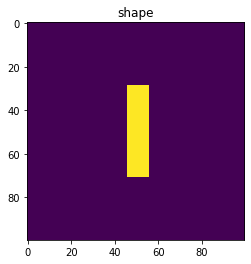

In [15]:
#task 1
from PIL import Image, ImageDraw
import pylab
import numpy as np

#setting dimentions
w,h=100,100
shape=[(50,29),w-50,h-30]

#creating image
im=Image.new("I",(w,h))
img=ImageDraw.Draw(im)
img.line(shape,fill="white",width=10)

#showing image
pylab.imshow(im)
pylab.title("shape")
pylab.show()

### Task 2
In this part, the code dras two imafes and finds the Fourier transform of one of the images. A Gaussian filter is then applied to the image and then the inverse is found.

A Gaussian filter is a filter that reduces the noise in an image. The Gaussian function is defined as:
$$G_{\sigma}=\frac{1}{2\pi \sigma^2}e^{-\frac{(x^2+y^2)}{2\sigma^2}}$$
Where $\sigma$ is the standard deviation, and $(x,y)$ are the coordinates of the pixals on the image.

In this code, an imported function in used to apply the filter.

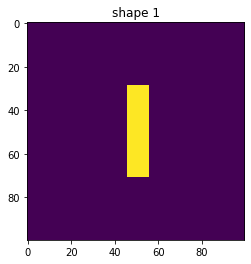

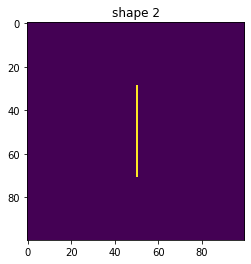

In [2]:
#task 2

#image 1

#dimentions
w,h=100,100
shape=[(50,29),w-50,h-30]

#creating image
im=Image.new("I",(w,h))
img=ImageDraw.Draw(im)
img.line(shape,fill="white",width=10)

#showing image
pylab.imshow(im)
pylab.title("shape 1")
pylab.show()

#image 2

#dimentions
w,h=100,100
shape2=[(50,29),w-50,h-30]

#creating image
im2=Image.new("I",(w,h))
img2=ImageDraw.Draw(im2)
img2.line(shape2,fill="white")

#showing image
pylab.imshow(im2)
pylab.title("shape 2")
pylab.show()

C:\Users\Orla\anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


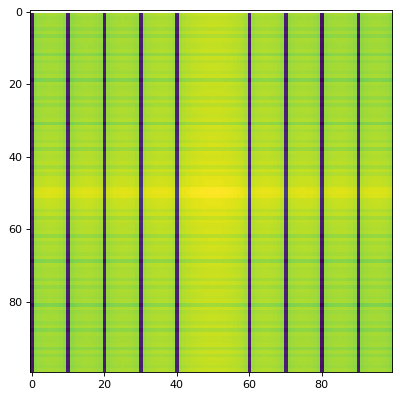

In [3]:
#discrete FT of image

#funtion to find and shift the FT
def FT(im):
    return np.fft.fftshift(np.fft.fft2(im))

import matplotlib.pyplot as plt

#calculating the FT of image 1
FT1=FT(im)

#plot code
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(FT1)))
plt.show()

C:\Users\Orla\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


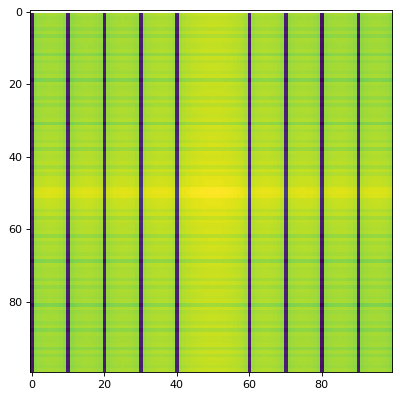

In [4]:
#Gaussian Filter

#importing filter
from scipy.ndimage import gaussian_filter

#defining standard deviation
sig=0.1

#removing imaginary element
FT1r=FT1*np.conj(FT1)
FT1r=FT1r.real

#applying filter
GFFT=gaussian_filter(FT1r, sigma=sig)

#plot code
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(GFFT)))
plt.show() 

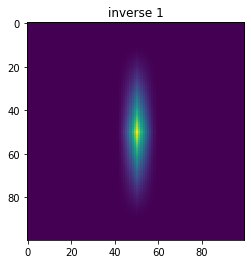

In [5]:
#inverse tranform of image

#funtion to inverse and shift the transform
def IFT(FT):
    return np.fft.ifftshift(np.fft.ifft2(FT))

#finding inverse transform
iim=IFT(GFFT)

#removing imaginary element
iimr=iim*np.conj(iim)
iimr=iimr.real

#plot code
pylab.imshow(iimr)
pylab.title("inverse 1")
pylab.show()

### Task 3
This part puts all of part 2 into a function so that it can quicky be applied to another image. Then the function is applied to the other image created at the start of part 2.

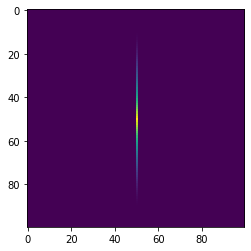

In [6]:
#task 3

#function to summarise task 2
def Fanalysis(im):
    
    #transform and shift of image
    FTim=FT(im)
    
    #finding real part
    FTimr=FTim*np.conj(FTim)
    FTimr=FTimr.real
    
    #applying filter
    GFFT=gaussian_filter(FTimr, sigma=sig)
    
    #finding inverse tranform
    iim=IFT(GFFT)
    
    #finding real part
    iimr=iim*np.conj(iim)
    iimr=iimr.real
    
    #showing image
    pylab.imshow(iimr)
    pylab.show()

#applying function to second image
Fanalysis(im2)

# Part B

### Task 4
In this part, the image of a cat is imported, It is then put through a Foutier Transform and the absolute log of it is found so that a magnitude spectrum could be made.

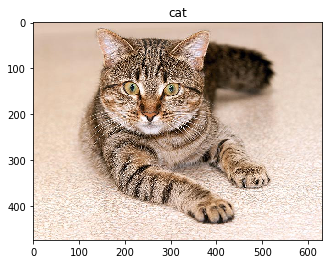

In [7]:
#task 4

#importing libaries for greyscaling
from skimage import color
from skimage import io

#opening image
im=io.imread("cat.jpg") #or im=Image.open("cat.jpg")
pylab.imshow(im)
pylab.title("cat")
pylab.show()

#changing the image to greyscale
im=color.rgb2gray(im)

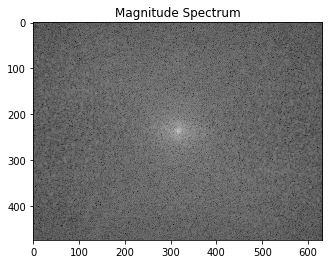

In [14]:
#discrete FT

#finding FT of the cat
FTcat=FT(im)

#plotting mag spectrum
pylab.imshow((np.log(abs(FTcat))),cmap="gray")
plt.title("Magnitude Spectrum")
pylab.show()

### Task 5
Finally in this part, the image of the cat is reconstructed.

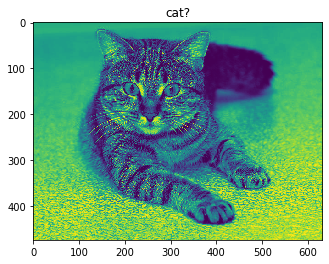

In [13]:
#task 5

#finding inverse tranform and shift
iim=IFT(FTcat)

#shifting again as once wasn't enough
iim=np.fft.ifftshift(iim)

#finding real part
iimr=iim*np.conj(iim)
iimr=iimr.real

#showing image
pylab.imshow((iimr*225).astype(np.uint8))
pylab.title("cat?")
pylab.show()

It is the cat again but this time in the weird yellow-y green colours of the "gray-scale".